In [3]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib
%matplotlib inline
%matplotlib inline


Using matplotlib backend: <object object at 0x000002A03AEB3290>


In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
array = []
directory = r'.\tes\cobi'
temp = pd.DataFrame()
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        array = os.path.join(directory, filename)
        df = pd.read_csv(array).assign(kelas=filename.split('.')[0])
        tes = df.loc[df['Proses'] == 'P2']
        sth = temp.append(tes, ignore_index=True)
        temp = sth
print(temp)

      Proses  MQ3  MQ4  MQ5  MQ8  MQ9  MQ135        kelas
0         P2  346  355  101  257  102    338     LELE0jam
1         P2  329  368  107  269   94    321     LELE0jam
2         P2  350  357   93  265  106    340     LELE0jam
3         P2  341  376  102  260   97    340     LELE0jam
4         P2  359  375   96  255   98    350     LELE0jam
...      ...  ...  ...  ...  ...  ...    ...          ...
16195     P2  402  366   86  251  103    351  PATIN7,5jam
16196     P2  389  363   89  268  104    345  PATIN7,5jam
16197     P2  400  363   89  268  106    348  PATIN7,5jam
16198     P2  415  360   86  258   95    335  PATIN7,5jam
16199     P2  407  377   88  253  101    363  PATIN7,5jam

[16200 rows x 8 columns]


In [6]:
temp['kelas'].describe(), temp['kelas'].unique()

(count        16200
 unique          18
 top       LELE0jam
 freq           900
 Name: kelas, dtype: object,
 array(['LELE0jam', 'LELE10jam', 'LELE2,5jam', 'LELE24jam', 'LELE5jam',
        'LELE7,5jam', 'NILA0jam', 'NILA10jam', 'NILA2,5jam', 'NILA24jam',
        'NILA5jam', 'NILA7,5jam', 'PATIN0jam', 'PATIN10jam', 'PATIN2,5jam',
        'PATIN24jam', 'PATIN5jam', 'PATIN7,5jam'], dtype=object))

<AxesSubplot:>

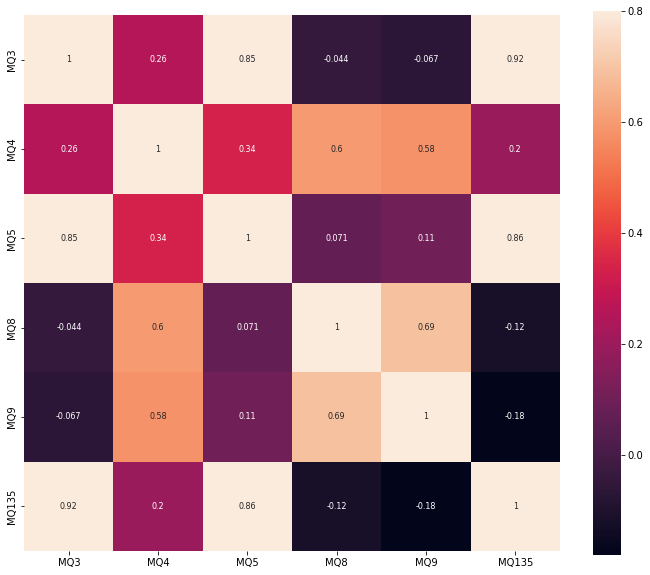

In [7]:
corrmat = temp.corr()
f,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':8})

In [8]:
temp = temp[ temp['MQ3'].apply(lambda x: x >300)]
temp = temp[ temp['MQ4'].apply(lambda x: x >350)]
temp = temp[ temp['MQ5'].apply(lambda x: x >80)]
temp = temp[ temp['MQ8'].apply(lambda x: x >250)]
temp = temp[ temp['MQ9'].apply(lambda x: x >90)]
temp = temp[ temp['MQ135'].apply(lambda x: x >300)]

In [9]:
# Extract features
Sensor = ['MQ3', 'MQ4', 'MQ5', 'MQ8', 'MQ9', 'MQ135']
X = temp.loc[:, Sensor ].values

# Extract target i.e. iris species
y = temp.loc[:, ['kelas']].values
#y = temp.loc[:, temp.columns!='Kelas']
#X = tes[['MQ5','MQ135']]
#y = tes['kelas']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [11]:
X = pd.DataFrame(X_train)
X.describe()

,0,1,2,3,4,5
count,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000,6959.000000
mean,405.322748,377.539014,102.925564,275.086219,112.492168,363.650237
std,55.372601,15.982120,18.721539,12.225122,17.249414,47.441322
min,316.000000,351.000000,81.000000,251.000000,91.000000,309.000000
25%,365.000000,366.000000,90.000000,265.000000,100.000000,335.000000
50%,392.000000,377.000000,97.000000,275.000000,107.000000,350.000000
75%,438.000000,387.000000,112.000000,283.000000,122.000000,375.000000
max,727.000000,570.000000,328.000000,368.000000,286.000000,757.000000


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [13]:
X_train

array([[0.1459854 , 0.12785388, 0.05668016, 0.26495726, 0.13846154,
        0.02232143],
       [0.40389294, 0.29680365, 0.1417004 , 0.29059829, 0.10769231,
        0.29464286],
       [0.29683698, 0.20091324, 0.29554656, 0.23076923, 0.41025641,
        0.18080357],
       ...,
       [0.28467153, 0.19634703, 0.06477733, 0.14529915, 0.06153846,
        0.12053571],
       [0.12895377, 0.01369863, 0.05668016, 0.23076923, 0.07692308,
        0.06919643],
       [0.10218978, 0.0456621 , 0.04453441, 0.1965812 , 0.06153846,
        0.046875  ]])

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

logreg=LogisticRegression(C=10, solver='newton-cg')
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.7780


In [15]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['NILA2,5jam', 'NILA10jam', 'LELE7,5jam', ..., 'PATIN10jam',
       'PATIN2,5jam', 'PATIN0jam'], dtype=object)

In [16]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7834


In [17]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7834
Test set score: 0.7780


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    LELE0jam       0.72      0.92      0.81       435
   LELE10jam       0.91      0.96      0.93       440
  LELE2,5jam       0.73      0.14      0.24       334
   LELE24jam       1.00      0.42      0.59        19
    LELE5jam       0.53      0.52      0.52       440
  LELE7,5jam       0.96      0.99      0.98       437
    NILA0jam       0.78      0.76      0.77       447
   NILA10jam       0.98      0.98      0.98       449
  NILA2,5jam       0.94      0.99      0.97       452
   NILA24jam       1.00      1.00      1.00        71
    NILA5jam       0.76      0.75      0.75       459
  NILA7,5jam       0.97      0.93      0.95       458
   PATIN0jam       0.59      0.65      0.62       452
  PATIN10jam       0.79      0.87      0.83       449
 PATIN2,5jam       0.52      0.50      0.51       468
  PATIN24jam       0.96      0.97      0.96       359
   PATIN5jam       0.57      0.64      0.60       448
 PATIN7,5jam       0.72    